# <center>TP 1. Problème de Bandits</center>

## 1. Chargement des données

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
txt = open("data.txt")
text = []
i = 0
for word in txt:
    text.append((word.split(':')[1].split(';')) + word.split(':')[2].split(';'))
    text[i][14] = text[i][14][:-2]
    i+=1
data = np.array(text).astype(np.float)

In [61]:
n = 5000
d = 5
actions = 10
context,rewards = np.split(data,[d],axis=1)

In [28]:
context.shape

(5000, 5)

In [40]:
#1- Random choice algorithm
rdm_nb = np.random.randint(10,size=n)
Sum_Random = 0
Random_Curve = []
for k in range(n):
    Sum_Random+=rewards[k][rdm_nb[k]]
    Random_Curve.append(Sum_Random)
print('Random choice : ',round(Sum_Random,2))

Random choice :  403.33


In [41]:
random_choice = [rewards[k][x] for k,x in zip(range(n),np.random.randint(10,size=n))]
print('Random choice : ',round(sum(random_choice),2))

Random choice :  389.8


## 2. Algorithmes de modélisation de politique

#### Random : on choisit au hasard

In [42]:
rdm_nb = np.random.randint(10,size=5000)
Sum_Random = 0
Random_Curve = []
for k in range(5000):
    Sum_Random+=data[k][5+rdm_nb[k]]
    Random_Curve.append(Sum_Random)
print('Random choice : ',round(Sum_Random,2))

Random choice :  383.34


#### StaticBest : on choisit toujours le bras ayant la meilleur moyenne (nécessite de connaître les gains futurs)

In [43]:
Sum_Static_Best = 0
Static_Best_Curve = []
for k in range(5000):
    Sum_Static_Best += data[k][data.mean(axis=0)[5:].argmax()+5]
    Static_Best_Curve.append(Sum_Static_Best)
print('Static best choice : ',round(Sum_Static_Best,2))

Static best choice :  1339.64


#### Optimal : on choisit le meilleur gain (nécessite de connaître les gains futurs)

In [56]:
Sum_Optimal = 0
Optimal_Curve = []
for k in range(5000):
    Sum_Optimal+=data[k][5:].max()
    Optimal_Curve.append(Sum_Optimal)
print('Optimal choice : ',round(Sum_Optimal,2))

Optimal choice :  1532.0


In [57]:
#2- Staticbest algorithm
optimal = [x.max() for x in rewards]
print('Optimal choice : ',round(sum(optimal),2))

Random choice :  1532.0


#### UCB : algorithme qui prend en compte l'espérance passée et un intervalle de confiance (équilibre exploration / exploitation)

In [89]:
#Auxiliary function
def update_UCB(k,Exp,Upper_Bound,Choice,Choice_nb):
    Exp[Choice_nb] = Exp[Choice_nb]*(Choice[Choice_nb]-1)/Choice[Choice_nb] + data[k][5+Choice_nb]/Choice[Choice_nb]
    for i in range(10):
        Upper_Bound[i] = Exp[i] +  np.sqrt(2*np.log(k)/Choice[i])
    return Exp,Upper_Bound

#Variables
Sum_UCB = 0
UCB_Curve = []
UCB_Exp = np.zeros(10)
UCB_Upper_Bound = np.zeros(10)
UCB_Choice =np.ones(10)


#initialization
for k in range(10):
    UCB_Exp[k]=data[k][k+5]
    UCB_Upper_Bound[k] = UCB_Exp[k] + np.sqrt(2*np.log(9))
    Sum_UCB += UCB_Exp[k]
    UCB_Curve.append(Sum_UCB)

#UCB algo
for k in range(10,5000):
    choice = UCB_Upper_Bound.argmax()
    UCB_Choice[choice]+=1
    UCB_Exp,UCB_Upper_Bound = update_UCB(k,UCB_Exp,UCB_Upper_Bound,UCB_Choice,choice)
    Sum_UCB += data[k][5+choice]
    UCB_Curve.append(Sum_UCB)
    
print('UCB choice : ',round(Sum_UCB,2))

UCB choice :  1000.59


In [88]:
#Auxiliary function
def update_UCB(k,exp,upperbound,actions,choice):
    actions[choice]+=1
    exp[choice] = ( exp[choice]*(actions[choice]-1) + rewards[k][choice] ) /actions[choice]
    upperbound = exp +  np.sqrt(2*np.log(k)/actions)
    return exp,upperbound,actions

#initialization
UCB = []
UCB_exp = np.array([rewards[k][k] for k in range(actions)])
UCB_upperbound = UCB_exp + np.sqrt(2*np.log(9))
UCB_actions =np.ones(actions)

#running algorithm
for k in range(actions,n):
    choice = UCB_upperbound.argmax()
    UCB.append(rewards[k][choice])
    UCB_exp,UCB_upperbound,UCB_actions = update_UCB(k,UCB_exp,UCB_upperbound,UCB_actions,choice)
    
print('UCB choice : ',round(sum(UCB),2))

UCB choice :  999.92


#### UCB-V : algorithme UCB avec prise en compte de la variance

In [84]:
#Auxiliary function
def update_UCBV(k,Exp,Var,Upper_Bound,Choice,Choice_nb):
    Exp[Choice_nb] = Exp[Choice_nb]*(Choice[Choice_nb]-1)/Choice[Choice_nb] + data[k][5+Choice_nb]/Choice[Choice_nb]
    Var[Choice_nb] = Var[Choice_nb]*(Choice[Choice_nb]-1)/Choice[Choice_nb] + ((data[k][5+Choice_nb]-Exp[Choice_nb])**2)/Choice[Choice_nb]
    for i in range(10):
        Upper_Bound[i] = Exp[i] + np.sqrt(2*np.log(k)*Var[i]/Choice[i]) + np.log(k)/(Choice[i]*2)
    return Exp,Var,Upper_Bound

#Variables
Sum_UCBV = 0
UCBV_Curve = []
UCBV_Exp = np.zeros(10)
UCBV_Var = np.zeros(10)
UCBV_Upper_Bound = np.zeros(10)
UCBV_Choice =np.ones(10)


#initialization
for k in range(10):
    UCBV_Exp[k]=data[k][k+5]
    UCBV_Upper_Bound[k] = UCBV_Exp[k]
    Sum_UCBV += UCBV_Exp[k]
    UCBV_Curve.append(Sum_UCBV)

#UCB algo
for k in range(10,5000):
    choice = UCBV_Upper_Bound.argmax()
    UCBV_Choice[choice]+=1
    UCBV_Exp,UCBV_Var,UCBV_Upper_Bound = update_UCBV(k,UCBV_Exp,UCBV_Var,UCBV_Upper_Bound,UCBV_Choice,choice)
    Sum_UCBV += data[k][5+choice]
    UCBV_Curve.append(Sum_UCBV)
    
print('UCBV choice : ',round(Sum_UCBV,2))

UCBV choice :  1292.12


In [87]:
#Auxiliary function
def update_UCBV(k,exp,var,upperbound,actions,choice):
    actions[choice]+=1
    exp[choice] = ( exp[choice]*(actions[choice]-1) + rewards[k][choice] ) /actions[choice]
    var[choice] = ( var[choice]*(actions[choice]-1) + (rewards[k][choice]-exp[choice])**2 ) /actions[choice]
    upperbound = exp +  np.sqrt(2 * np.log(k) * var / actions) + np.log(k) / ( actions * 2)
    return exp,var,upperbound,actions

#initialization
UCBV = []
UCBV_exp = np.array([rewards[k][k] for k in range(actions)])
UCBV_var = np.zeros(10)
UCBV_upperbound = UCBV_exp
UCBV_actions =np.ones(actions)

#running algorithm
for k in range(actions,n):
    choice = UCBV_upperbound.argmax()
    UCBV.append(rewards[k][choice])
    UCBV_exp,UCBV_var,UCBV_upperbound,UCBV_actions = update_UCBV(k,UCBV_exp,UCBV_var,UCBV_upperbound,UCBV_actions,choice)
    
print('UCB choice : ',round(sum(UCBV),2))

UCB choice :  1291.45


#### LinUCB : algorithme UCB avec prise en compte du contexte (i.e. des données autres que les rewards passées)

In [125]:
#LinUCB

#Auxiliary functions
def compute_teta(_A,_b):
    return np.dot(np.linalg.inv(_A),_b)

def compute_estimator(_teta,_x,_alpha,_A):
    return np.dot(_x.T,_teta) + _alpha * np.sqrt(np.dot(_x.T,compute_teta(_A,_x)))
                                                 
def update_LinUCB(_A,_b,_LinUCB_Sum,_LinUCB_Estimator,r,x):
    arm = _LinUCB_Estimator.argmax()
    _A[arm] += np.dot(x.T,x)
    _b[arm] += r[arm] * x
    _LinUCB_Sum += r[arm]
    return _A,_b,_LinUCB_Sum


#Parameters
alpha = 1

#Variables
context = data[:,:5]
rewards = data[:,5:]

LinUCB_Sum = 0
LinUCB_Curve = []
LinUCB_Estimator = np.zeros(10)
A = []
b = []

#initialization
for k in range(10):
    A.append(np.identity(5))
    b.append(np.zeros(5))
    teta = compute_teta(A[k],b[k])
    LinUCB_Estimator[k] = compute_estimator(teta,context[0],alpha,A[k])

A,b,LinUCB_Sum = update_LinUCB(A,b,LinUCB_Sum,LinUCB_Estimator,rewards[0],context[0])
LinUCB_Curve.append(LinUCB_Sum)
print(A)
    
    
#LinUCB algo
for k in range(1,5000):
    for i in range(10):
        teta = compute_teta(A[i],b[i])
        LinUCB_Estimator[i] = compute_estimator(teta,context[k],alpha,A[i])
    
    A,b,LinUCB_Sum = update_LinUCB(A,b,LinUCB_Sum,LinUCB_Estimator,rewards[k],context[k])
    LinUCB_Curve.append(LinUCB_Sum)
print('LinUCB choice : ',round(LinUCB_Sum,2))

[array([[2.31382571, 1.31382571, 1.31382571, 1.31382571, 1.31382571],
       [1.31382571, 2.31382571, 1.31382571, 1.31382571, 1.31382571],
       [1.31382571, 1.31382571, 2.31382571, 1.31382571, 1.31382571],
       [1.31382571, 1.31382571, 1.31382571, 2.31382571, 1.31382571],
       [1.31382571, 1.31382571, 1.31382571, 1.31382571, 2.31382571]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
      

In [151]:
#LinUCB
#Auxiliary functions
def compute_teta(_A,_b):
    return np.dot(np.linalg.inv(_A),_b)

def compute_estimator(_teta,_x,_alpha,_A):
    return np.dot(_x.T,_teta) + _alpha * np.sqrt(np.dot(_x.T,compute_teta(_A,_x)))
                                                 
def update_LinUCB(_A,_b,_LinUCB_est,_LinUCB,r,x):
    arm = _LinUCB_est.argmax()
    _A[arm] = _A[arm] + np.dot(x.T,x)
    _b[arm] = _b[arm] + r[arm] * x
    _LinUCB.append(r[arm])
    return _A,_b,_LinUCB

def compute_LinUCB(alpha=1):
    #initialization
    LinUCB = []
    A = [np.identity(d)] * actions
    b = [np.zeros(d)] * actions

    #LinUCB algo
    for k in range(n): 
        LinUCB_est = np.array([compute_estimator(compute_teta(A[i],b[i]),context[k],alpha,A[i]) for i in range(actions)])
        A,b,LinUCB = update_LinUCB(A,b,LinUCB_est,LinUCB,rewards[k],context[k])
    return LinUCB

#Gridsearch to take the best alpha
alpha = [i/10 for i in range(1,11)]
LinUCBs = [compute_LinUCB(alpha=a) for a in alpha]
LinUCB = max(LinUCBs,key= lambda x: sum(x))

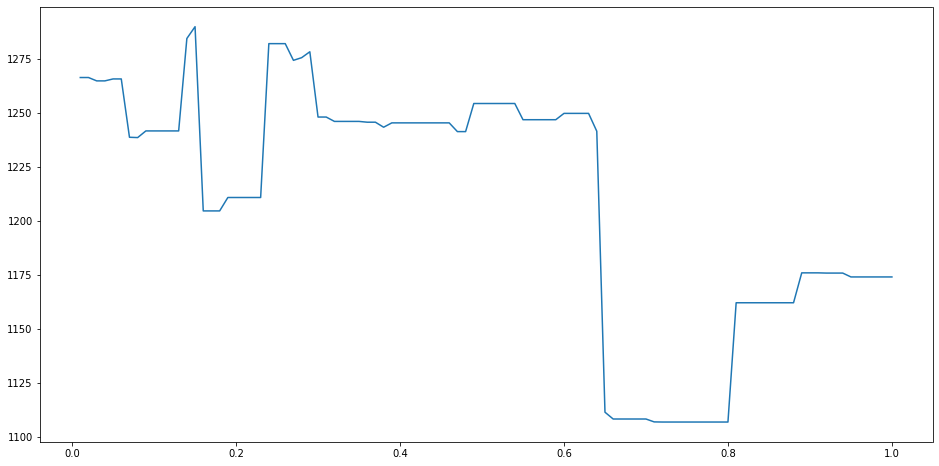

In [175]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(alpha,[sum(LinUCB) for LinUCB in LinUCBs])
plt.show()



## 3. Résultats

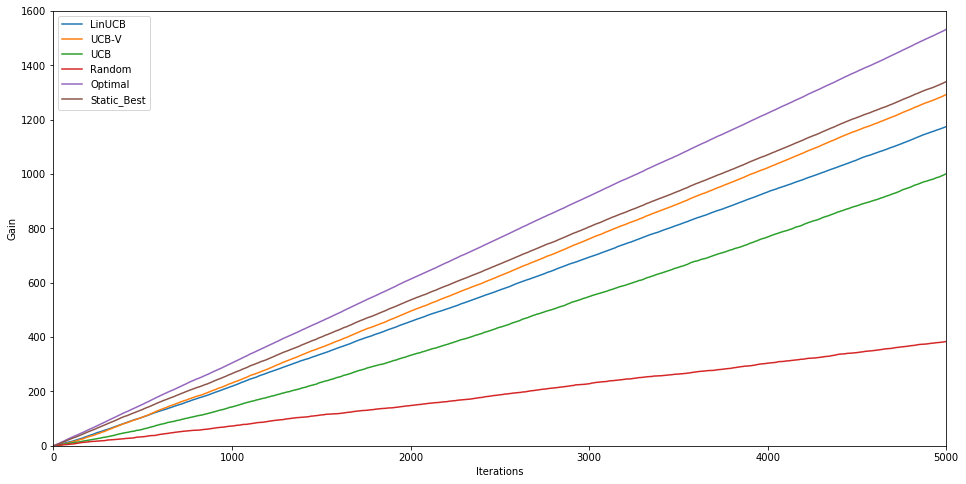

In [177]:
plt.plot()
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.xlabel("Iterations")
plt.ylabel("Gain")
plt.plot(LinUCB_Curve,label = "LinUCB")
plt.plot(UCBV_Curve,label = "UCB-V")
plt.plot(UCB_Curve,label = "UCB")
plt.plot(Random_Curve,label = "Random")
plt.plot(Optimal_Curve,label = "Optimal")
plt.plot(Static_Best_Curve,label = "Static_Best")
plt.xlim((0,5000))
plt.ylim((0,1600))
plt.legend()
plt.show()

In [178]:
List[int]

NameError: name 'List' is not defined